# How to Use Unsupervised Clustering on Well Log Data

Understanding the subsurface lithology is an important task in geoscience and petrophysics. Using a variety of electrical measurements generated from well logging technology we are able to make inferences about the underlying geology, such as the lithology, facies, porosity, and permeability. 

Machine Learning algorithms have routinely been adopted to group well log measurements into distinct lithological groupings, known as facies. This process can be achieved using either unsupervised learning or supervised learning algorithms. 

__Supervised learning__ is the most common and practical of machine learning tasks and it is designed to learn from example using input data that has been mapped to the "correct" output. Alternatively, we can run the modelling using __Unsupervised Learning__, where we let the algorithms identify underlying patterns within the data that may not be easily visible during data exploration. 

In this tutorial we will be carrying out unsupervised learning classification using three clustering methods (K Means Clustering, Gaussian Mixture Modelling and DBSCAN) and comparing the results with an established Lithofacies curve.

## What is Clustering / Cluster Analysis?
Clustering of data is a common form of exploratory data analysis (EDA) which is used to divide up the data into different groups based on shared characteristics or properties. Data points that are similar to each other are grouped together in the same cluster, and those that are different are placed in another cluster.

### K-Means Clustering
K-Means clustering is a very commonly used unsupervised machine learning algorithm. It is used to group data into K number of clusters by minimising the distance between the data point and the centroid. 

The centroid is initialised at k random points in the data space and all points around it are assigned to the relevant cluster based on the distance to the centroid. The centroid is then adjusted to the central point of the cluster and the points surrounding it are reassigned. This continues until either there is no change in the centroids or the points remain in the same cluster or until a maximum number of iterations is reached.

K-Means is a hard clustering method where a data point either belongs to a cluster or it does not. It also carries out clustering by applying a circle (or hyper-sphere in multi-dimensional datasets)to the data.


### Gaussian Mixture Modelling
The GMM method also allows data points to be clustered, except that it accounts for data variance, results in a softer classification and rather than being distance based it is distribution based. 

Also, the data point being classified has a probability of being one cluster or another. 

While K-Means clustering works great if the data clusters are circular, however, in petrophysical and geological situations data rarely forms nice circular patterns. GMM modelling uses eliptical shaped cluster/decision boundaries and are therefore more flexible.

An excellent article looking at the differences between the two methods can be found at https://www.analyticsvidhya.com/blog/2019/10/gaussian-mixture-models-clustering/

## Dataset
The dataset we are using for this tutorial forms part of a Machine Learning competition run by Xeek and FORCE 2020 (https://doi.org/10.5281/zenodo.4351155). The objective of the compettion was to predict lithology from existing labelled data. The dataset consists of 118 wells from the Norwegian Sea.

## Importing Libraries & Data Loading
The first step of the project is to import the libraries that we require.  For this example we will be using [NumPy](https://numpy.org) for working with arrays, [pandas](https://pandas.pydata.org) for storing data, [seaborn](https://seaborn.pydata.org) and [matplotlib](https://matplotlib.org) for displaying the data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import matplotlib.colors as colors

We will then read in the data using `pd.read_csv` and then view the data description using the `describe()` method. 

In [2]:
df = pd.read_excel("FCIEN/Pozo N0_9_B_X1 - BELEN.xlsx")

In [3]:
df.describe()

,DEPT:2,ILD,ILM,SFLU,SP,DT,GR,CALI,RHOB,DRHO,...,URAN,POTA,SGR,CGR,W5NG,W4NG,W3NG,W2NG,W1NG,CS
count,11593.000000,11593.000000,11593.000000,11593.000000,11592.000000,11591.000000,11593.000000,11591.000000,8614.000000,8614.000000,...,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000,3588.000000
mean,1441.141708,385.885711,360.327509,282.129516,-7.788152,74.345006,45.973481,11.625606,2.451241,0.019407,...,2.931792,1.742969,81.577841,59.443208,3.832423,3.214742,20.961873,80.988703,212.584935,278.419227
std,545.191302,1028.359028,716.361346,566.191758,26.608602,19.996620,137.370625,1.082044,0.287524,0.100786,...,7.292768,1.856289,39.824237,56.319548,31.037142,92.578423,139.747330,113.592025,391.883088,66.321565
min,518.008000,0.023000,0.108000,0.239000,-75.250000,9.061000,-1882.000000,1.623000,-8.414000,-6.849000,...,-415.900000,-97.047000,-170.878000,0.000000,-1847.928000,-5537.783000,-8321.699000,0.000000,-22355.659000,-358.715000
25%,959.663000,15.992000,15.976000,18.250000,-21.549750,65.011000,27.446000,10.961000,2.301000,0.000000,...,1.170000,0.977000,39.531000,29.355250,2.011750,2.298000,12.786250,38.937750,106.065250,256.946000
50%,1401.470000,34.906000,26.109000,26.877000,-6.537500,74.002000,38.195000,11.516000,2.386000,0.006000,...,2.778000,1.904000,91.938500,68.473500,3.925000,4.355000,24.619000,89.064000,242.374000,265.786000
75%,1923.288000,75.564000,48.188000,57.559000,9.373000,84.624000,75.687000,12.320000,2.575000,0.014000,...,4.647750,2.393000,117.063500,83.186000,6.303250,6.855000,32.656000,113.496000,314.565250,269.748000
max,2364.943000,79034.803000,2000.000000,2000.000000,59.578000,217.156000,227.437000,14.555000,18.301000,4.534000,...,9.577000,4.199000,182.731000,2971.506000,14.140000,16.278000,51.336000,6468.862000,547.439000,663.242000


As it is quite a big table, we can view the columns by calling upon `df.columns`.

In [4]:
df.columns

Index(['DEPT:2', 'ILD', 'ILM', 'SFLU', 'SP', 'DT', 'GR', 'CALI', 'RHOB',
       'DRHO', 'PEF', 'LL', 'LU1', 'LU2', 'LU', 'LS', 'LITH', 'SS1', 'SS2',
       'NRAT', 'NPHI', 'THOR', 'URAN', 'POTA', 'SGR', 'CGR', 'W5NG', 'W4NG',
       'W3NG', 'W2NG', 'W1NG', 'CS'],
      dtype='object')

We don't need all of the columns for this example, so we will take a copy of the dataframe with the required logging measurements, including the well name and the depth curve.

In [5]:
workingdf = df[["DEPT:2", "ILD", "ILM", "SFLU", "SP", "GR"]].copy()

We will also rename the `FORCE_2020_LITHOFACIES_LITHOLOGY` column to something simpler like `FACIES`.

In [ ]:
#workingdf.rename(columns={'FORCE_2020_LITHOFACIES_LITHOLOGY':'FACIES'}, inplace=True)

In [6]:
workingdf

,DEPT:2,ILD,ILM,SFLU,SP,GR
0,2364.943,2000.000,1191.000,748.000,-41.030,-1882.000
1,2364.791,2000.000,1738.019,539.873,-40.650,-1882.000
2,2364.638,2000.000,1999.629,493.815,-40.218,-1882.000
3,2364.486,2000.000,1856.151,662.323,-39.731,-1882.000
4,2364.334,2000.000,1922.954,595.046,-39.299,-1882.000
...,...,...,...,...,...,...
11588,518.617,2.521,2000.000,70.875,40.740,26.348
11589,518.465,2.742,4.869,70.000,43.519,27.839
11590,518.312,1.116,5.015,68.375,46.540,28.562
11591,518.160,2000.000,1999.553,58.677,46.540,28.883


## Column Remapping / Renaming

To make things simpler with plotting, and understanding what the lithology numbers supplied with the data mean, we can create two dictionaries and map the `FACIES` column to two new columns.

The first is creating a dictionary for the string representations of the numbers.

In [7]:
lithology_numbers = {30000: 'Sandstone',
                 65030: 'Sandstone/Shale',
                 65000: 'Shale',
                 80000: 'Marl',
                 74000: 'Dolomite',
                 70000: 'Limestone',
                 70032: 'Chalk',
                 88000: 'Halite',
                 86000: 'Anhydrite',
                 99000: 'Tuff',
                 90000: 'Coal',
                 93000: 'Basement'}

The second dictionary is simplifying the lithology number to range from 1 to 12 instead of the large range of numbers used in the original data. This will help when it comes to making a log plot.

In [8]:
simple_lithology_numbers = {30000: 1,
                 65030: 2,
                 65000: 3,
                 80000: 4,
                 74000: 5,
                 70000: 6,
                 70032: 7,
                 88000: 8,
                 86000: 9,
                 99000: 10,
                 90000: 11,
                 93000: 12}

To create new columns in our dataframe, we start with defining the column name `workingdf['LITH']` and then we assign the mapped values using the `.map()` method.

We do this for both the string and simple number representations of the facies.

In [ ]:
workingdf['LITH'] = workingdf['FACIES'].map(lithology_numbers)

In [ ]:
workingdf['LITH_SI'] = workingdf['FACIES'].map(simple_lithology_numbers)

When we view the dataframe, we can see that we now have our two new columns at the end.

## Visualising the Data

As there is already a FACIES column with this data, we can take a quick look to see how the data is distributed across each lithofacies.

To do this we can use Seaborn's `FacetGrid` method to plot individual density-neutron crossplots (scatterplots) for each lithology. 

The FacetGrid is used to create an underlying structure for the plot. In this example, the FacetGrid has been passed the dataframe we are working with (`workingdf`), the column we want to split the plots up by (`col`) and the point at which we want to wrap to a new row (`col_wrap`). In this instance, once there are 4 columns, then the data will wrap.

We can then map a density neutron crossplot ontop of that `FacetGrid`.

In [ ]:
g = sns.FacetGrid(workingdf, col='LITH', col_wrap=4)
g.map(sns.scatterplot, 'NPHI', 'RHOB', alpha=0.5)
g.set(xlim=(-0.15, 1))
g.set(ylim=(3, 1))

Before we plot any data we need to create a few functions. The first is a create plot function, which will take a number of arguments and our facies curve, and will generate a conventional log plot.

In [20]:
def create_plot(wellname, dataframe, curves_to_plot, depth_curve, log_curves=[], facies_curves=[]):
    # Count the number of tracks we need
    num_tracks = len(curves_to_plot)
    
    facies_color = ['#F4D03F', '#F5B041','#DC7633','#6E2C00', '#1B4F72','#2E86C1', '#AED6F1', '#A569BD', '#196F3D', 'red','black', 'blue']
    
            
    # Setup the figure and axes
    fig, ax = plt.subplots(nrows=1, ncols=num_tracks, figsize=(num_tracks*2, 10))
    
    # Create a super title for the entire plot
    fig.suptitle(wellname, fontsize=20, y=1.05)
    
    # Loop through each curve in curves_to_plot and create a track with that data
    for i, curve in enumerate(curves_to_plot):
        if curve in facies_curves:
            cmap_facies = colors.ListedColormap(facies_color[0:dataframe[curve].max()], 'indexed')
            
            cluster=np.repeat(np.expand_dims(dataframe[curve].values,1), 100, 1)
            im=ax[i].imshow(cluster, interpolation='none', cmap=cmap_facies, aspect='auto',vmin=dataframe[curve].min(),vmax=dataframe[curve].max(), 
                            extent=[0,20, depth_curve.max(), depth_curve.min()])
            
#             for key in lithology_setup.keys():
#                 color = lithology_setup[key]['color']
#                 ax[i].fill_betweenx(depth_curve, 0, dataframe[curve].max(), 
#                                   where=(dataframe[curve]==key),
#                                   facecolor=color)
#                 
        else:
            ax[i].plot(dataframe[curve], depth_curve)

        
        # Setup a few plot cosmetics
        ax[i].set_title(curve, fontsize=14, fontweight='bold')
        ax[i].grid(which='major', color='lightgrey', linestyle='-')
        
        # We want to pass in the deepest depth first, so we are displaying the data 
        # from shallow to deep
        ax[i].set_ylim(depth_curve.max(), depth_curve.min())
#         ax[i].set_ylim(3500, 3000)

        # Only set the y-label for the first track. Hide it for the rest
        if i == 0:
            ax[i].set_ylabel('DEPTH (m)', fontsize=18, fontweight='bold')
        else:
            plt.setp(ax[i].get_yticklabels(), visible = False)
        
        # Check to see if we have any logarithmic scaled curves
        if curve in log_curves:
            ax[i].set_xscale('log')
            ax[i].grid(which='minor', color='lightgrey', linestyle='-')
        

    
    plt.tight_layout()
    plt.savefig("KNN.jpg")
    plt.show()
    
    return cmap_facies

### Splitting Data by Well Function
The second method we will create will be used to split up our dataframe by wells. This is done using the `groupby` function, and will allow us to store each dataframe within a list for easy access later.

In [10]:
def well_splitter(dataframe, groupby_column):
    grouped = dataframe.groupby(groupby_column)
    
    # Create empty lists
    wells_as_dfs = []
    wells_wellnames = []

    #Split up the data by well
    for well, data in grouped:
        wells_as_dfs.append(data)
        wells_wellnames.append(well)

    print('index  wellname')
    for i, name in enumerate(wells_wellnames):
        print(f'{i}      {name}')
    
    return wells_as_dfs, wells_wellnames

In [ ]:
grouped_wells, grouped_names = well_splitter(workingdf, 'WELL')

We now have a list of wells and their index position with the list object. 

## Clustering - Unsupervised

In this section, we are going to setup our clustering models and run them on our dataset.

First we will import our clustering models from the sklearn library.

In [11]:
from sklearn.cluster import KMeans
from sklearn.mixture import GaussianMixture

### Finding the Optimum Number of Clusters

To make sure that K-Means and Gaussian Mixture Modelling models are working efficiently we need to provide them with a starting number of clusters. If the number of clusters is incorrectly selected, the algorithms may not perform well or could take longer to resolve (especially if the number is too high).

We can attempt to identify the optimum number of clusters using an elbow plot, where the goal is to select a number for the clusters based on the 'elbow' or inflection formed in the results. There are other methods such as the silhouette method for picking the number of clusters.

For this example, we will use the elbow plot. To do this we evaluate the model performance over a given range of clusters, and then from the plot identify the most suitable number.

In [12]:
def optimise_k_means(data, max_k):
    means = []
    inertias = []
    
    for k in range(1,max_k):
        kmeans = KMeans(n_clusters=k)
        kmeans.fit(data)
        means.append(k)
        inertias.append(kmeans.inertia_)
        
    fig = plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.grid(True)
    plt.show()
    

For clustering to work, we need to remove any missing values. This is achieved using the `dropna()` function.

In [13]:
workingdf.dropna(inplace=True)

We can then use the `describe()` function to make sure our data is still good after the missing data values have been removed. In this example we have gone from 133198 to 82732 depth levels.

In [ ]:
workingdf.describe()

To keep our model simple we will work with four logging measurements (columns): Gamma Ray (GR), Bulk Density (RHOB), Neutron Porosity (NPHI) and Acoustic Compressional Slowness (DTC).

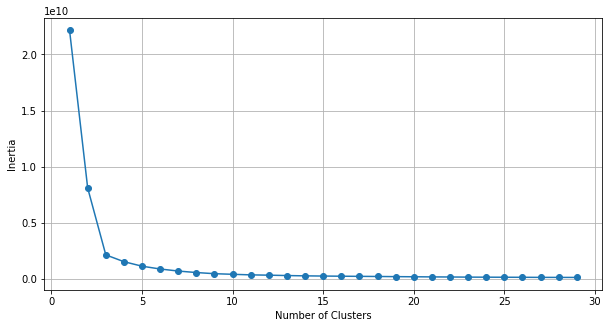

In [14]:
optimise_k_means(workingdf[['ILD', 'ILM', 'SFLU', 'SP', 'GR']], 30)

In the plot above, we can see that the inertia (sum of the squared distances to the nearest cluster center) decreases as we increase the number of clusters. There is no clear defined break within this dataset, however, we can see that the slope changes from about 5 clusters onwards. The picking of this value will be dependent on the interpreter and could range from 4 to 10.

So for this example we will take 5 as the optimum number of clusters.

### Fitting the Clustering Models

In [15]:
# Create the KMeans model with the selected number of clusters
kmeans = KMeans(n_clusters=3)

# Fit the model to our dataset
kmeans.fit(workingdf[['ILD', 'ILM', 'SFLU', 'SP', 'GR']])

# Assign the data back to the workingdf
workingdf['KMeans'] = kmeans.labels_

To make the comparison simple, we will use the same number of clusters in the Gaussian Mixture Model. For this model the number of clusters parameter is known as n_components.

In [16]:
# Create the gmm model with the selected number of clusters/components
gmm = GaussianMixture(n_components=3)

# Fit the model to our dataset
gmm.fit(workingdf[['ILD', 'ILM', 'SFLU', 'SP', 'GR']])

# Predict the labels
gmm_labels = gmm.predict(workingdf[['ILD', 'ILM', 'SFLU', 'SP', 'GR']])

# Assign the labels back to the workingdf
workingdf['GMM'] = gmm_labels

## Plotting the Results

Now that the clusters have been computed using KMeans and GMM methods, we can plot the data to see how well the predicted in relation to the labelled lithologies. Note that these methods are unsupervised and do not use the labelled data for training. We are comparing here how well unsupervised methods perform with well log data.

As we predicted into the main `workingdf` dataframe, we need to split the data up again into individual wells. We can do this by calling upon the simple function created earlier.

In [ ]:
dfs_wells, wellnames = well_splitter(workingdf, 'WELL')

The first plot we will look at is the logplot. We will pass in the original lithofacies (LITH_SI) column and the newly computed KMeans and GMM results.

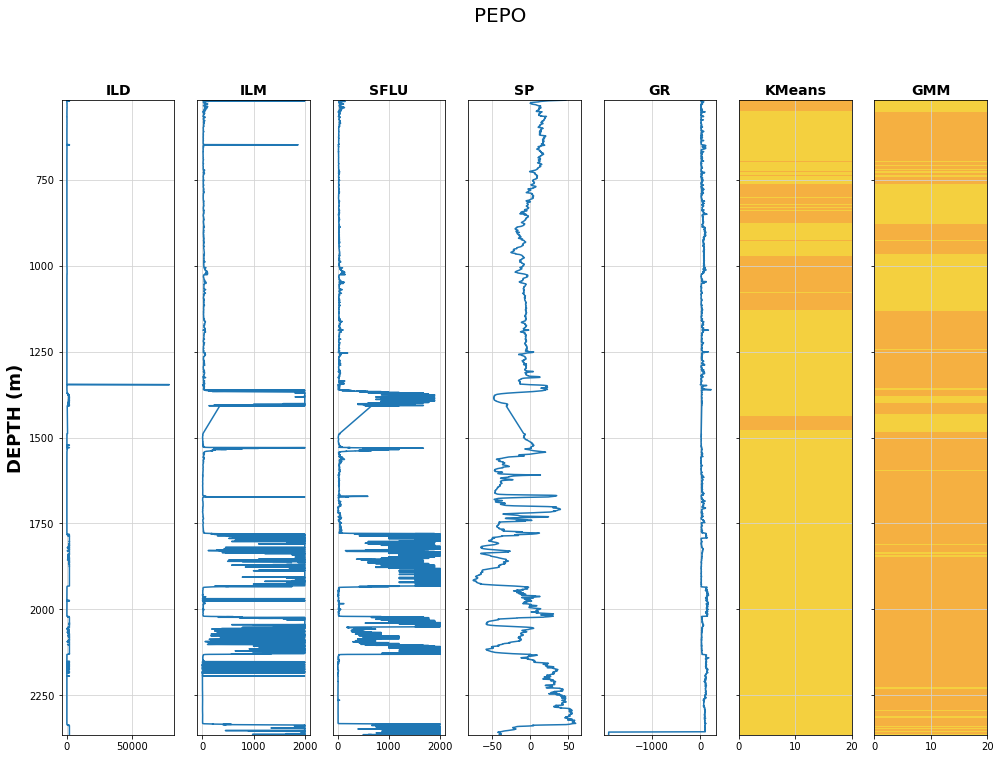

In [21]:
# Setup the curves to plot
curves_to_plot = ['ILD', 'ILM', 'SFLU', 'SP', 'GR', 'KMeans','GMM']
logarithmic_curves = ['RDEP']
facies_curve=['KMeans','GMM']

# Create plot by passing in the relevant well index numberb
cmap_facies = create_plot('PEPO', 
            workingdf, 
            curves_to_plot, 
            workingdf['DEPT:2'], 
            logarithmic_curves, facies_curve)

<Figure size 432x288 with 0 Axes>

In the plot above we have the original Lithology and our computed KMeans and GMM cluster results in the last three subplots. 

The first thing to note is that the colours do not neccessarily mean the data is from the same group across each method. There are way to map these so that the colouring is consistent, but for the purposes of this tutorial, we will not go into this.

Looking at well 16/10-1 (index 4), we have 10 separate facies/groups displayed and we can see that these mostly tie up with the changes in the logging measurements. For example the decrease in Gamma Ray (GR) from around 2300m to around 2775m ties in nicely with the blue and light blue grouping. In the KMeans and GMM models, this section has also been highlighted as being in the same cluster in both methods, however, there is no variation in this section. As both of these methods were set to a max of 5 clusters, we will not be able to capture the same degree of variation.

To resolve this, we could increase the number of clusters.

### Viewing Results on Scatterplots / Crossplots

Another way to view the performance of the clustering is through scatter plots. We can do this using the common density-neutron scatterplots / crossplots and using matplotlib.

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
ax1 = plt.subplot2grid((1,3), (0,0))
ax1.scatter(dfs_wells[well]['NPHI'], dfs_wells[well]['RHOB'], c=dfs_wells[well]['KMeans'], s=8, cmap=cmap_facies)
ax1.set_title('KMeans', fontsize=22, y=1.05)

ax2 = plt.subplot2grid((1,3), (0,1))
ax2.scatter(dfs_wells[well]['NPHI'], dfs_wells[well]['RHOB'], c=dfs_wells[well]['GMM'], s=8)
ax2.set_title('GMM', fontsize=22, y=1.05)

ax3 = plt.subplot2grid((1,3), (0,2))
ax3.scatter(dfs_wells[well]['NPHI'], dfs_wells[well]['RHOB'], c=dfs_wells[well]['LITH_SI'], s=8)
ax3.set_title('Lithology (Supplied)', fontsize=22, y=1.05)

for ax in [ax1, ax2, ax3]:
    ax.set_xlim(0, 0.7)
    ax.set_ylim(3, 1.5)
    ax.set_ylabel('RHOB', fontsize=18, labelpad=30)
    ax.set_xlabel('NPHI', fontsize=18, labelpad=30)
    ax.grid()
    ax.set_axisbelow(True)

    ax.tick_params(axis='both', labelsize=14)
plt.tight_layout()

Even though there is mixing of the clusters in each method, the interval that was discussed in the log plot section can be identified in the lower left of the plot, where we have higher density values and lower neutron porosity values.

In the KMeans grouping, this cluster shows as one complete cluster, however, in the GMM method we can see it matches closer to the supplied lithology.

### Viewing Results on a Pairplot
As we used four input curves for our model, we should look at all of these to see how the clusters vary. The best way to do this is to use the excellent pairplot from the seaborn library. This plot displays the relationships between the data in the dataset on a grid. This allows a quick and easy way to identify and visualise the data. Along the diagonal the distribution of the data split by cluster is also plotted.

As we are looking at well number 4 we need to pass in that dataframe to the pairplot (dfs_wells[4])

In [ ]:
sns.pairplot(dfs_wells[4], vars=['GR', 'RHOB','NPHI', 'DTC'], hue='KMeans', palette='Dark2',
             diag_kind='kde', plot_kws = {'s': 15, 'marker':'o', 'alpha':1})

In [ ]:
sns.pairplot(dfs_wells[4], vars=['GR', 'RHOB','NPHI', 'DTC'], hue='GMM', palette='Dark2',
             diag_kind='kde', plot_kws = {'s': 15, 'marker':'o', 'alpha':1})

This provides us a much nicer plot to look at and also allows us to see how the data is clustered in the other logging curves. We can see that the GMM model provides some improvement in defining the clusters, especially in the DTC vs RHOB plot.

# Summary
In this article we have covered the basics for carrying out unsupervised cluster analysis using two popular algorithms - KMeans Clustering and Gaussian Mixture Modelling. Using an optimisation method we have determined, by eye, that the optimum number of clusters was five, however, it is worth experimenting with more clusters to see if this provides a better match.

Once the clustering was complete, we saw multiple ways to visualise the results: a standard log plot setup, scatter plots and seaborn's pairplot. 

As K-Means clustering utilises spherical clusters, it may not always be appropriate to well log data and the subsurface. However, Gaussian Mixture Modelling does appear to provide a slight improvement in clustering.

***Thanks for reading!***

*If you have found this article useful, please feel free to check out my other articles looking at various aspects of Python and well log data. You can also find my code used in this article and others at [GitHub](https://github.com/andymcdgeo).*

*If you want to get in touch you can find me on [LinkedIn](https://www.linkedin.com/in/andymcdonaldgeo/) or at my [website](http://andymcdonald.scot/).*

*Interested in learning more about python and well log data or petrophysics? Follow me on [Medium](https://medium.com/@andymcdonaldgeo).*

If you have enjoyed this article or any others and want to show your appreciate you are welcome to [Buy Me a Coffee](https://www.buymeacoffee.com/andymcdonaldgeo)

# References

Bormann, Peter, Aursand, Peder, Dilib, Fahad, Manral, Surrender, & Dischington, Peter. (2020). FORCE 2020 Well well log and lithofacies dataset for machine learning competition [Data set]. Zenodo. http://doi.org/10.5281/zenodo.4351156